# Ejercicio 18
ejemplo de filtro


In [1]:
from scipy.signal import butter, lfilter, freqz
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style


def butter_bandpass(lowcut, highcut, fs, order =5):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order,[low,high],btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut,highcut, fs ,order=5):
    b, a = butter_bandpass(lowcut,highcut,fs, order=order)
    y = lfilter(b,a,data)
    return y



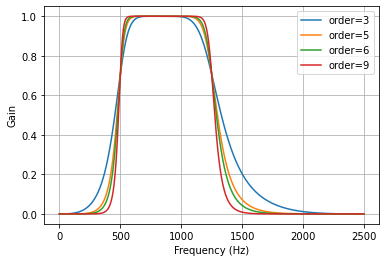

In [2]:
    fs = 5000
    lowcut =500
    highcut =1250

    plt.figure(1)

    for order in [3,5,6,9]:
        b,a = butter_bandpass(lowcut,highcut,fs, order =order)
        w,h = freqz(b,a,worN=2000)
        plt.plot((fs*0.5/np.pi)*w, abs(h),label ='order=%d'%order )

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid()
    plt.legend(loc='best')
    plt.show()
    #Test Filter

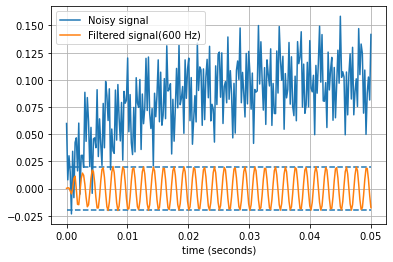

In [5]:
    T =0.05
    nsamples = (int)(T*fs) 
    t = np.linspace(0,T,nsamples)
    a = 0.02
    f0 = 600

    x1 = 0.1*np.sin(2*np.pi*1.2*np.sqrt(t))
    x2 = 0.01*np.cos(2*np.pi*312*t+0.1)
    x3 = a*np.cos(2*np.pi*f0*t+.11)
    x4 = 0.03*np.cos(2*np.pi*2000*t)

    x = x1+x2+x3+x4
    plt.figure(2)
    plt.plot(t,x, label='Noisy signal')

    y = butter_bandpass_filter(x,lowcut,highcut,fs,order=6)
    plt.plot(t,y,label ='Filtered signal(%g Hz)'% f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a,a],0,T,linestyles='--')
    plt.grid()
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.show()